In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')
import sqlite3


conn = sqlite3.connect("/home/sukanya/data-analysis-project/database/inventory.db")


In [2]:
#  loading the dataset
conn = sqlite3.connect("/home/sukanya/data-analysis-project/database/inventory.db")
df = pd.read_sql("select * from vendor_sales_summary",conn)
df.head(20)

,VendorNumber,VendorName,Brand,Description,ActualPrice,Volume,PurchasePrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,36.99,1750.0,26.27,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,1750.0,23.19,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,1750.0,18.24,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,1750.0,16.17,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,1750.0,21.89,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
5,480,BACARDI USA INC,3858,Grey Goose Vodka,23.99,750.0,17.77,138809,2466635.93,141860.0,3383912.40,446932.09,111699.19,89286.27,917276.47,27.106980,1.021980,1.371873
6,17035,PERNOD RICARD USA,2589,Jameson Irish Whiskey,39.99,1750.0,30.76,70783,2177285.08,69627.0,2773367.73,614529.34,127931.67,123780.22,596082.65,21.493098,0.983668,1.273773
7,3960,DIAGEO NORTH AMERICA INC,3102,Smirnoff Traveler,17.99,1750.0,12.94,161386,2088334.84,148265.0,2592041.35,292586.29,272422.60,257032.07,503706.51,19.432812,0.918698,1.241200
8,3960,DIAGEO NORTH AMERICA INC,3489,Tanqueray,27.99,1750.0,20.73,91835,1903739.55,90481.0,2640491.19,503661.02,166244.44,257032.07,736751.64,27.902068,0.985256,1.387002
9,12546,JIM BEAM BRANDS COMPANY,1376,Jim Beam,21.99,1750.0,16.29,108866,1773427.14,107061.0,2435393.39,426902.78,196707.35,123880.97,661966.25,27.181081,0.983420,1.373269


In [40]:
# summary statistics

df.describe(include = 'all').T



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,NaN,NaN,NaN,10650.649458,18753.519148,2.0,3951.0,7153.0,9552.0,201359.0
VendorName,10692,128,MARTIGNETTI COMPANIES,1388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,10692.0,NaN,NaN,NaN,18039.228769,12662.187074,58.0,5793.5,18761.5,25514.25,90631.0
Description,10692,9651,Southern Comfort,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ActualPrice,10692.0,NaN,NaN,NaN,35.643671,148.246016,0.49,10.99,15.99,28.99,7499.99
Volume,10692.0,NaN,NaN,NaN,847.36055,664.309212,50.0,750.0,750.0,750.0,20000.0
PurchasePrice,10692.0,NaN,NaN,NaN,24.385303,109.269375,0.36,6.84,10.455,19.4825,5681.81
TotalPurchaseQuantity,10692.0,NaN,NaN,NaN,3140.886831,11095.086769,1.0,36.0,262.0,1975.75,337660.0
TotalPurchaseDollars,10692.0,NaN,NaN,NaN,30106.693372,123067.799627,0.71,453.4575,3655.465,20738.245,3811251.6
TotalSalesQuantity,10692.0,NaN,NaN,NaN,3077.482136,10952.851391,0.0,33.0,261.0,1929.25,334939.0


In [3]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'ActualPrice',
       'Volume', 'PurchasePrice', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalesPurchaseRatio'],
      dtype='object')

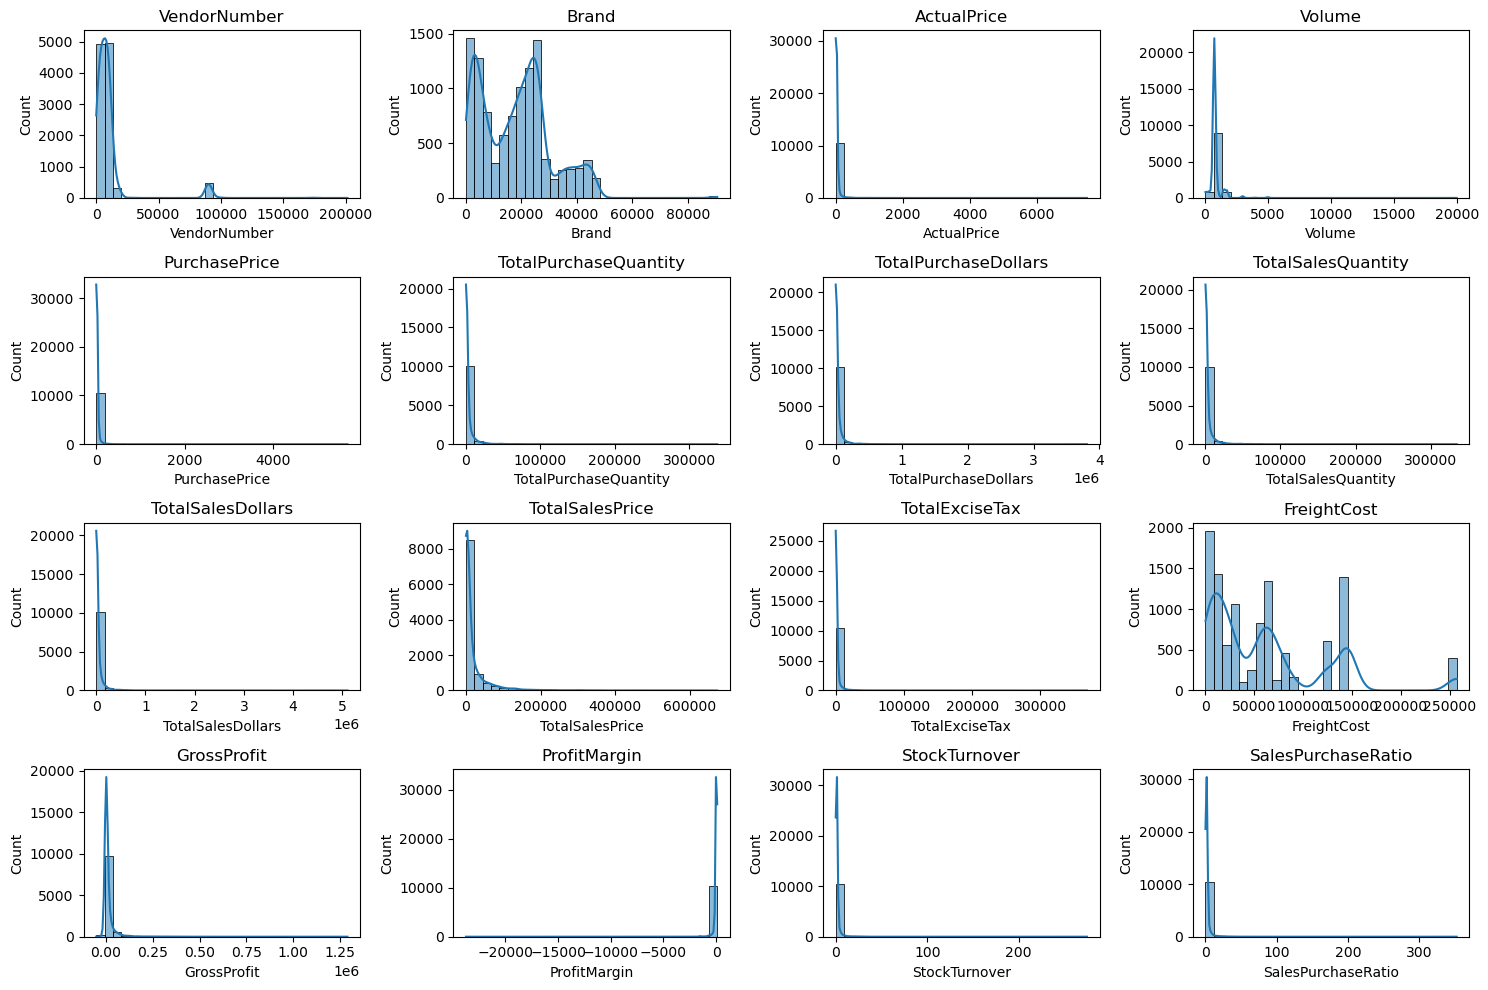

In [6]:
# Distribution Plots for Numerical Columns

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.savefig("/home/sukanya/data-analysis-project/outputs/figures/numerical_distributions.png")
plt.show()


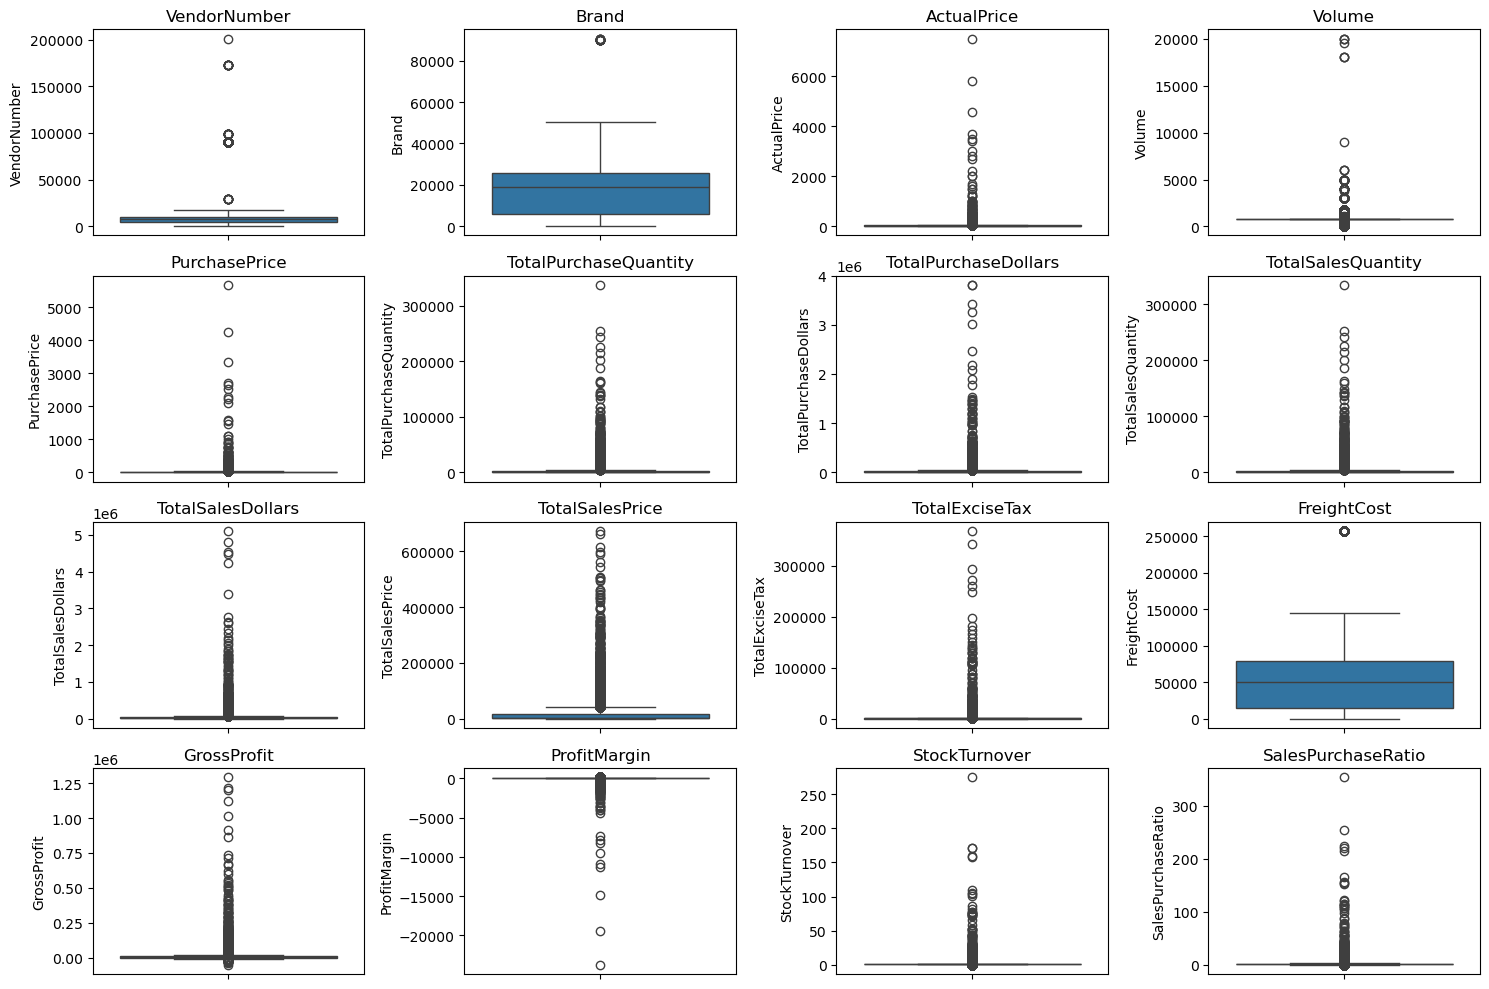

In [7]:
# Outliers Detection with Boxplots

plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.savefig("/home/sukanya/data-analysis-project/outputs/figures/boxplot_outliers.png")
plt.show()


In [3]:
df = pd.read_sql_query("""select  * from 
vendor_sales_summary
where GrossProfit > 0
and ProfitMargin > 0
and TotalSalesQuantity >0""",conn)
df

,VendorNumber,VendorName,Brand,Description,ActualPrice,Volume,PurchasePrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,36.99,1750.0,26.27,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,1750.0,23.19,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,1750.0,18.24,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,1750.0,16.17,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,1750.0,21.89,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,4.99,750.0,1.32,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.49,50.0,0.39,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.99,50.0,0.74,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.99,200.0,1.47,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


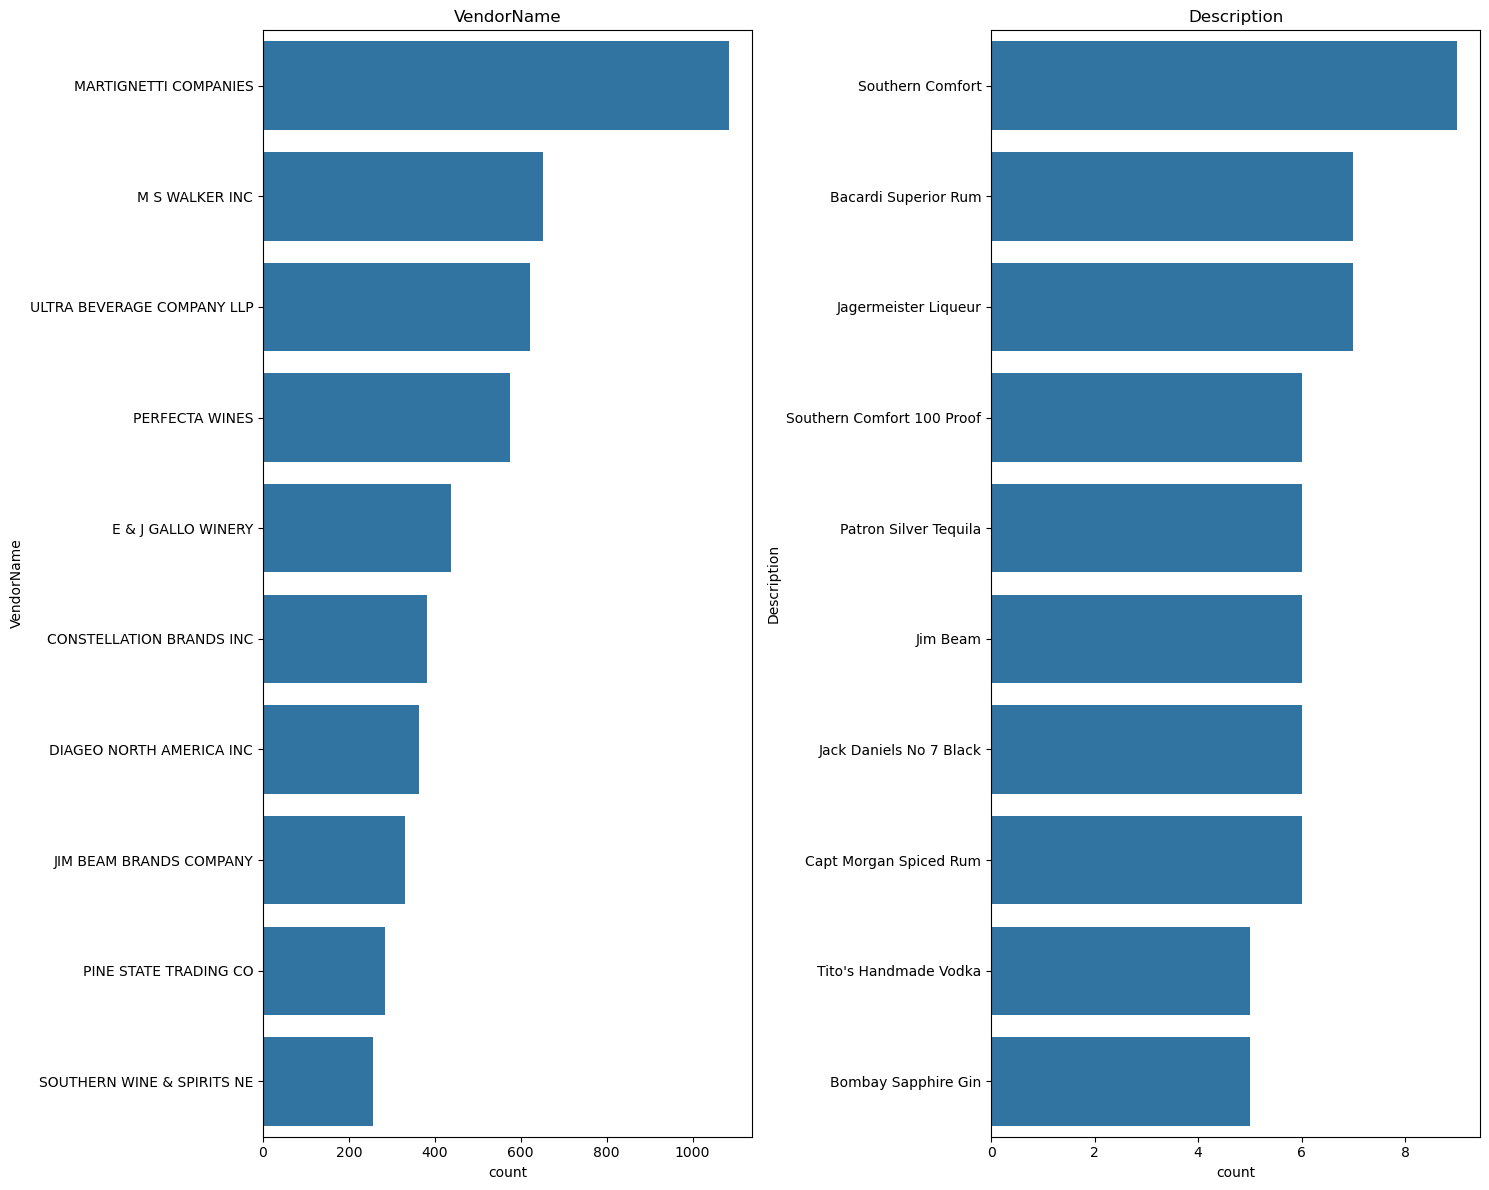

In [16]:
# Count Plots for Categorical Columns

categorical_cols = ['VendorName', 'Description']

plt.figure(figsize=(15,12))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(
        y=df[col],
        order=df[col].value_counts().index[:10]
    )
    plt.title(col)

plt.tight_layout()
plt.savefig("/home/sukanya/data-analysis-project/outputs/figures/categorical_countplots.png")
plt.show()



    

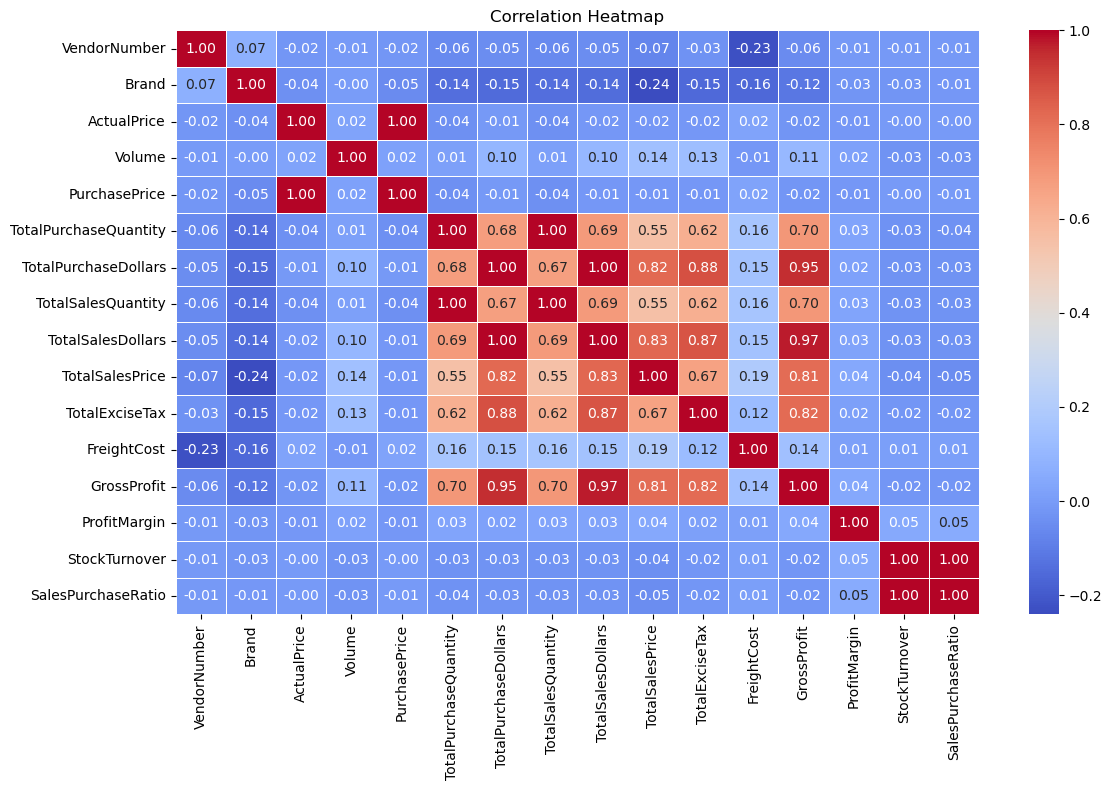

In [9]:
# Correlation Heatmap

plt.figure(figsize=(12,8))

correlation_matrix = df[numerical_cols].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")

plt.tight_layout()
plt.savefig("/home/sukanya/data-analysis-project/outputs/figures/correlation_heatmap.png")
plt.show()


In [46]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'ActualPrice',
       'Volume', 'PurchasePrice', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalesPurchaseRatio'],
      dtype='object')

Identify brands that need promotional or pricing adjustments which exhibit lower sales performance but higher profit margins


In [4]:

df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()
                              

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [6]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()
                              

In [7]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [54]:
low_sales_threshold

560.299

In [55]:
high_margin_threshold

64.97017552750113

In [8]:
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <=low_sales_threshold) &
    (brand_performance['ProfitMargin'] >=high_margin_threshold)
]
print("Brands with low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))


Brands with low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


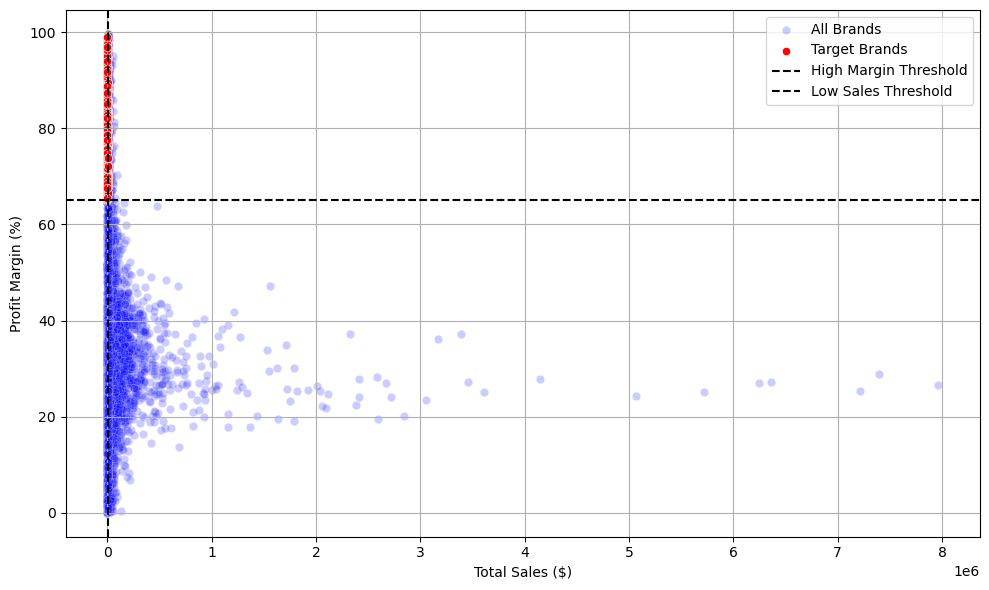

In [21]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="blue",
    label="All Brands",
    alpha=0.2
)

sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="red",
    label="Target Brands"
)

# horizontal line → Profit Margin threshold
plt.axhline(
    high_margin_threshold,
    linestyle='--',
    color='black',
    label="High Margin Threshold"
)

# vertical line → Sales threshold
plt.axvline(
    low_sales_threshold,
    linestyle='--',
    color='black',
    label="Low Sales Threshold"
)

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("/home/sukanya/data-analysis-project/outputs/figures/sales_vs_profit_margin.png")
plt.show()


Which vendors and brands demonstrate the highest sales performance

In [11]:
# converting dollars to millions

def format_dollars(value):
    if value >=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value /1_000:.2f}K"
    else:
        return str(value)

In [12]:
# Top vendors and Brands by Sales Performance 

top_vendors = df.groupby('VendorName')["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby('Description')["TotalSalesDollars"].sum().nlargest(10)


In [13]:
top_brands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [14]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

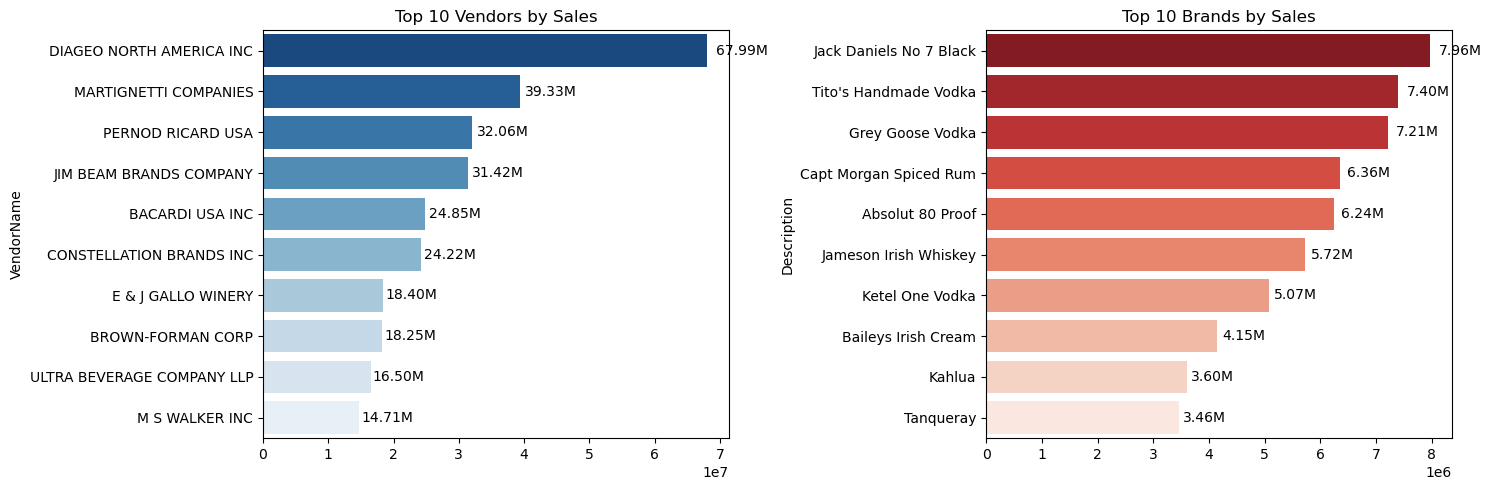

In [27]:
plt.figure(figsize=(15,5))

# plot for top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color="black"
    )

# plot for top brands
plt.subplot(1,2,2)
ax2 = sns.barplot(
    y=top_brands.index.astype(str),
    x=top_brands.values,
    palette="Reds_r"
)
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color="black"
    )

plt.tight_layout()
plt.savefig("/home/sukanya/data-analysis-project/outputs/figures/top_vendors_top_brands_sales.png")
plt.show()


Which vendors contribute the most to total purchase dollars?

In [15]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':"sum",
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance
                        

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [16]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%',ascending = False),2)

In [17]:
#  Display top 10 vendors

top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [32]:
top_vendors['PurchaseContribution%'].sum()

65.69000000000001

In [18]:
top_vendors['Cumulative_Contributions'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contributions
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


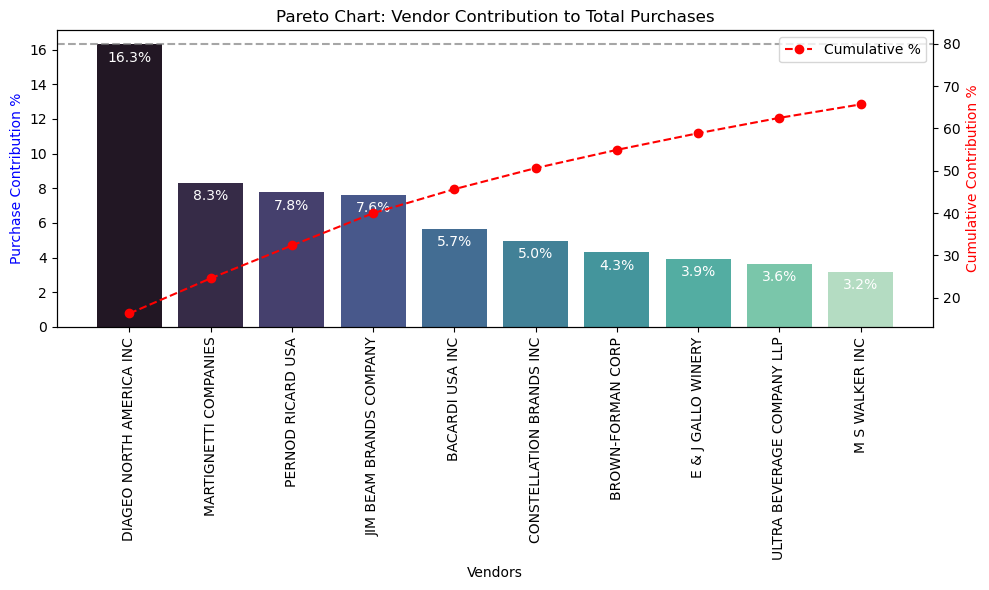

In [34]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution (%)
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseContribution%'],
    palette="mako",
    ax=ax1
)

# Add percentage labels on bars
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(
        i,
        value - 1,
        f"{value:.1f}%",
        ha='center',
        fontsize=10,
        color='white'
    )

# Line plot for Cumulative Contribution (%)
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contributions'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative %'
)

# Axis labels and title
ax1.set_xlabel('Vendors')
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Rotate x-axis labels
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)

# Grid and legend
ax2.axhline(80, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig("/home/sukanya/data-analysis-project/outputs/figures/pareto_vendor_purchase_contribution.png")
plt.show()


How much total procurement is dependent on the top vendors?

In [35]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 65.69 %


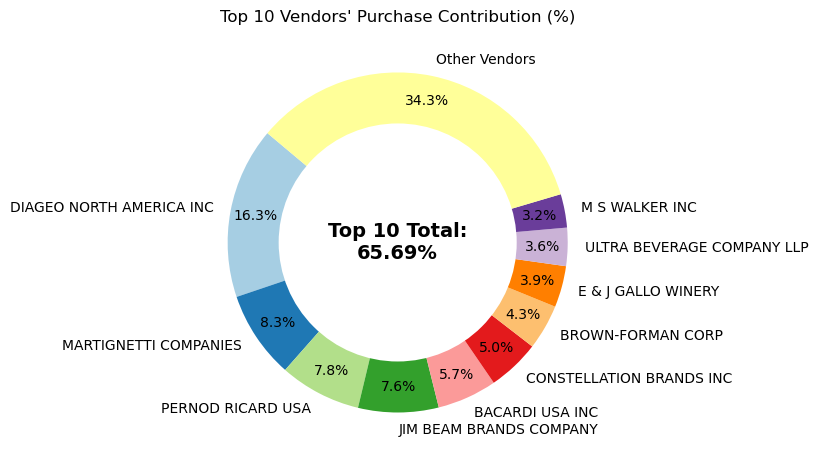

In [36]:
import matplotlib.pyplot as plt

# Vendor names and their purchase contribution percentages
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)

# Total contribution of top vendors
total_contribution = sum(purchase_contributions)

# Remaining contribution (Other vendors)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors"
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw white circle in center to make donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add total contribution text in center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

# Title
plt.title("Top 10 Vendors' Purchase Contribution (%)")
plt.tight_layout()

plt.savefig("/home/sukanya/data-analysis-project/outputs/figures/top10_vendor_purchase_donut.png")
plt.show()


Does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost savings?

In [19]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [20]:
df['OrderSize'] = pd.qcut(df["TotalPurchaseQuantity"],q=3,labels = ['Small','Medium','Large'])
df['OrderSize']

0       Large
1       Large
2       Large
3       Large
4       Large
        ...  
8559    Small
8560    Small
8561    Small
8562    Small
8563    Small
Name: OrderSize, Length: 8564, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']

In [21]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OrderSize', y = 'UnitPurchasePrice', palette = "Set2")

plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Purchase Uiit Price")
plt.show()
    

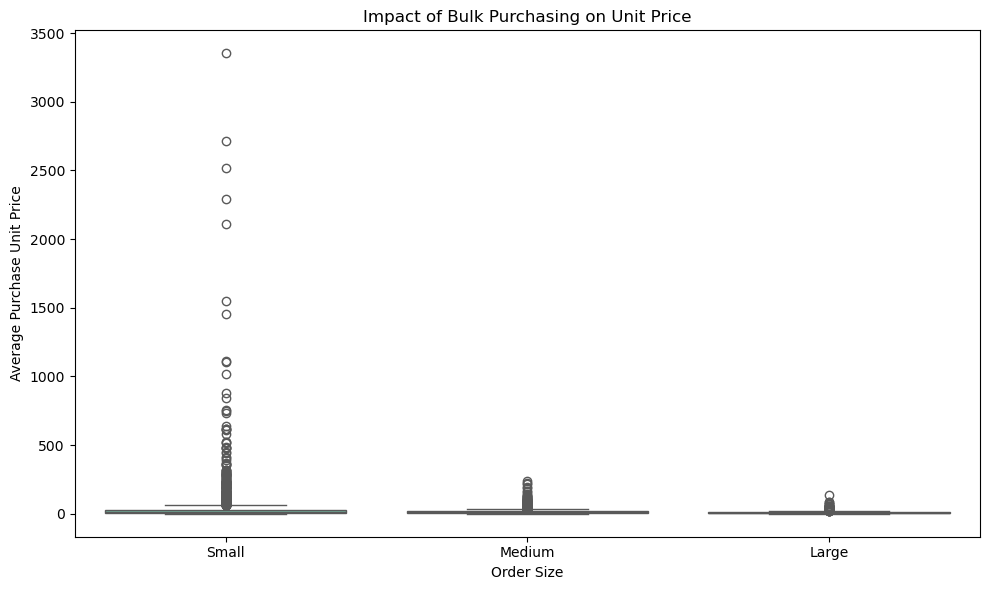

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice', palette="Set2")

plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size") 
plt.ylabel("Average Purchase Unit Price")

plt.tight_layout()
plt.savefig("/home/sukanya/data-analysis-project/outputs/figures/bulk_purchase_vs_unit_price.png")
plt.show()


Which vendors have low inventory turnover,indicating excess stock and slow-moving products?

In [22]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital capital is locked in insold inventory and which vendors contribute the most to it?

In [42]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:' , format_dollars(df['UnsoldInventoryValue'].sum()))    
            

Total Unsold Capital: 2.71M


In [43]:
#  Aggregate Capital Locked by vendor

inventory_value_per_vendor = df.groupby('VendorName')["UnsoldInventoryValue"].sum().reset_index()

# Sort vendors with the highest locked capital

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = 'UnsoldInventoryValue',ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)



,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


What is the 95% confidence intervals for profit margins of top performing and low performing vendors

In [44]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)


In [45]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= top_threshold]["ProfitMargin"].dropna()

In [46]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [47]:
low_vendors

1622     0.568840
1646     2.513325
1786    12.479372
1803    14.366830
1812    12.428142
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 6423, dtype: float64

In [48]:
from scipy import stats
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard Error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err

    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.67, 41.81), Mean: 41.24


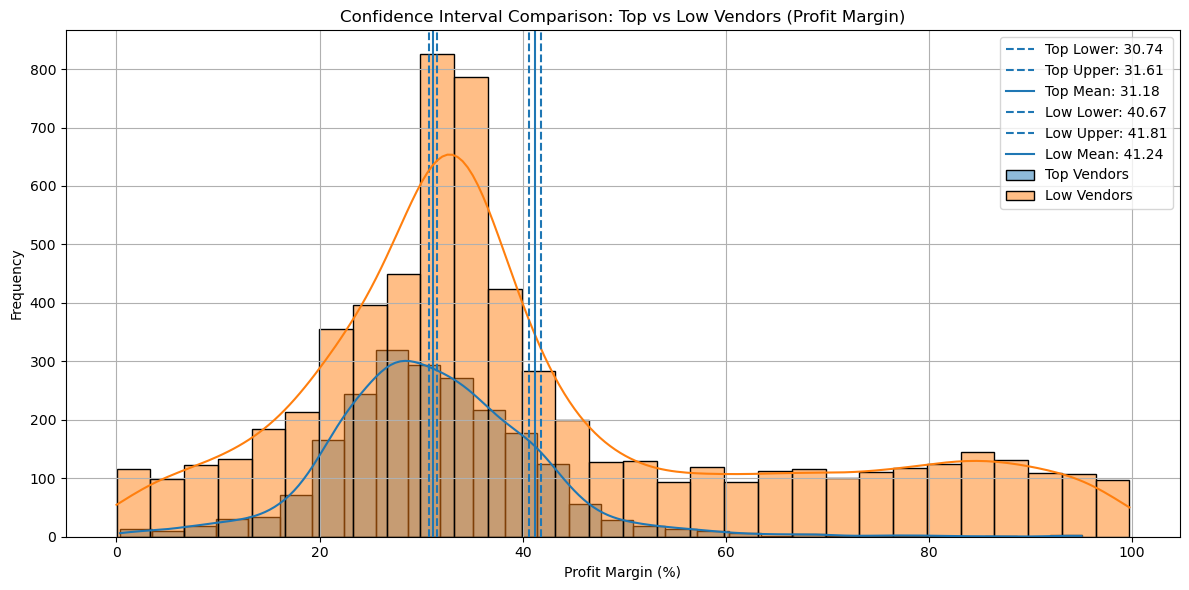

In [51]:
# Calculate confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print confidence intervals
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plot
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize plot
plt.title("Confidence Interval Comparison: Top vs Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig("/home/sukanya/data-analysis-project/outputs/figures/confidence_interval_top_vs_low_vendors.png")

plt.show()


In [6]:
# Define hypotheses
# H0 (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
# H1 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

# Define thresholds
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Split vendors
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")


T-Statistic: -17.6695, P-Value: 0.0000
Reject H0: There is a significant difference in profit margins between top and low-performing vendors.
